In [1]:
import pandas as pd
# Load dataset
data = pd.read_csv(r"D:\Data since couress\Basic stats - 1\sales_data_with_discounts.csv")

In [2]:
# Data Cleaning Example
data.dropna(inplace=True)

In [3]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit_transform(data.values)
df = pd.DataFrame(te_data, columns=te.columns_)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# Example: Convert all elements in your data to strings
data = data.applymap(str)

# Then proceed with TransactionEncoder
te = TransactionEncoder()
te_data = te.fit_transform(data.values)
df = pd.DataFrame(te_data, columns=te.columns_)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit_transform(data.values)
df = pd.DataFrame(te_data, columns=te.columns_)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [ ]:
transactions = data[['SKU', 'Brand', 'Model']].values.tolist()  # Replace with relevant columns


In [ ]:
transactions = [[str(item) for item in row] for row in transactions]


In [ ]:
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
encoded_df = pd.DataFrame(te_array, columns=te.columns_)


In [ ]:
print(encoded_df.head())  # View the first few rows
encoded_df.to_csv('encoded_transactions.csv', index=False)  # Save to CSV


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Load dataset
data = pd.read_csv(r'D:\Data since couress\Basic stats - 1\sales_data_with_discounts.csv')

# Select relevant columns for transactions
transactions = data[['SKU', 'Brand', 'Model']].values.tolist()

# Convert all elements to strings
transactions = [[str(item) for item in row] for row in transactions]

# Apply TransactionEncoder
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
encoded_df = pd.DataFrame(te_array, columns=te.columns_)

# Save or inspect the encoded data
encoded_df.to_csv('encoded_transactions.csv', index=False)
print(encoded_df.head())


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'D:\\Data since couress\\Basic stats - 1\\sales_data_with_discounts.csv'
sales_data = pd.read_csv(file_path)


In [ ]:
numerical_columns = sales_data.select_dtypes(include=['number']).columns

In [ ]:
# Calculate mean
mean_values = sales_data[numerical_columns].mean()


In [18]:
import pandas as pd

# Load the dataset
file_path = r'D:\Data since couress\Basic stats - 1\sales_data_with_discounts.csv'  # Ensure the path is correct
sales_data = pd.read_csv(file_path)

# Inspect column data types
print(sales_data.dtypes)

# Automatically select numerical columns
numerical_columns = sales_data.select_dtypes(include=['number']).columns
if len(numerical_columns) == 0:
    raise ValueError("No numerical columns found in the dataset!")

# Calculate median of numerical columns
median_values = sales_data[numerical_columns].median()
print("Median values of numerical columns:")
print(median_values)


Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object
Median values of numerical columns:
Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [20]:
# Ensure pandas is imported
import pandas as pd

# Ensure numerical columns are correctly selected
numerical_columns = sales_data.select_dtypes(include=['number']).columns

# Step 1: Calculate Mode
# Use `.mode()` and handle cases where multiple modes exist
mode_values = sales_data[numerical_columns].mode().iloc[0]

# Step 2: Calculate Standard Deviation
std_dev_values = sales_data[numerical_columns].std()

# Step 3: Combine all statistics into a DataFrame
statistics = pd.DataFrame({
    'Mean': sales_data[numerical_columns].mean(),  # Assuming mean_values weren't previously calculated
    'Median': sales_data[numerical_columns].median(),
    'Mode': mode_values,
    'Standard Deviation': std_dev_values
})

# Display the statistics DataFrame
print("Summary Statistics:")
print(statistics)

# Step 4: Interpretation (not a code step, but here's guidance)
# After calculating these statistics, interpret the results:
# - Mean: Average value for each numerical column.
# - Median: Middle value, robust to outliers.
# - Mode: Most frequent value, useful for identifying common trends.
# - Standard Deviation: Measure of data variability or spread.

# Example:
# If the standard deviation is high, it indicates greater variation in the data.
# If the mean and median are very different, it may suggest skewness in the data distribution.


Summary Statistics:
                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


In [22]:
statistics

,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


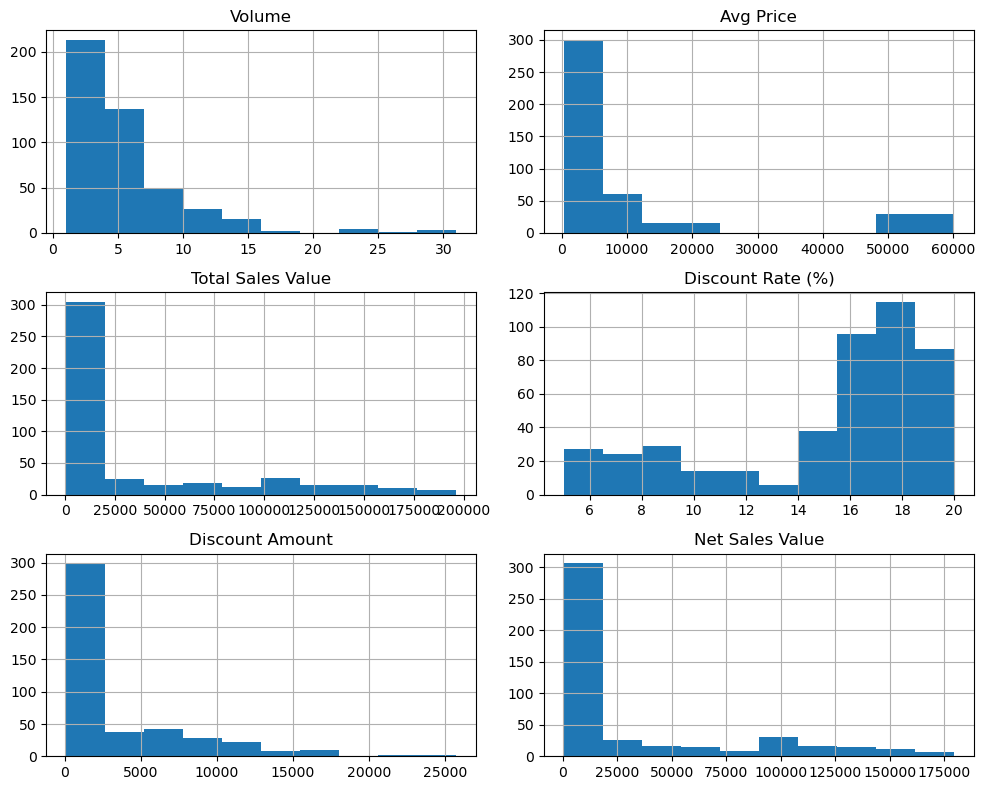

In [24]:
#Data Visualization

import matplotlib.pyplot as plt

sales_data[numerical_columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [26]:
#1.	Create Boxplots

In [28]:
sales_data[numerical_columns].plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 8))
plt.tight_layout()
plt.show()


ValueError: Layout of 2x2 must be larger than required size 6

<Figure size 1000x800 with 0 Axes>

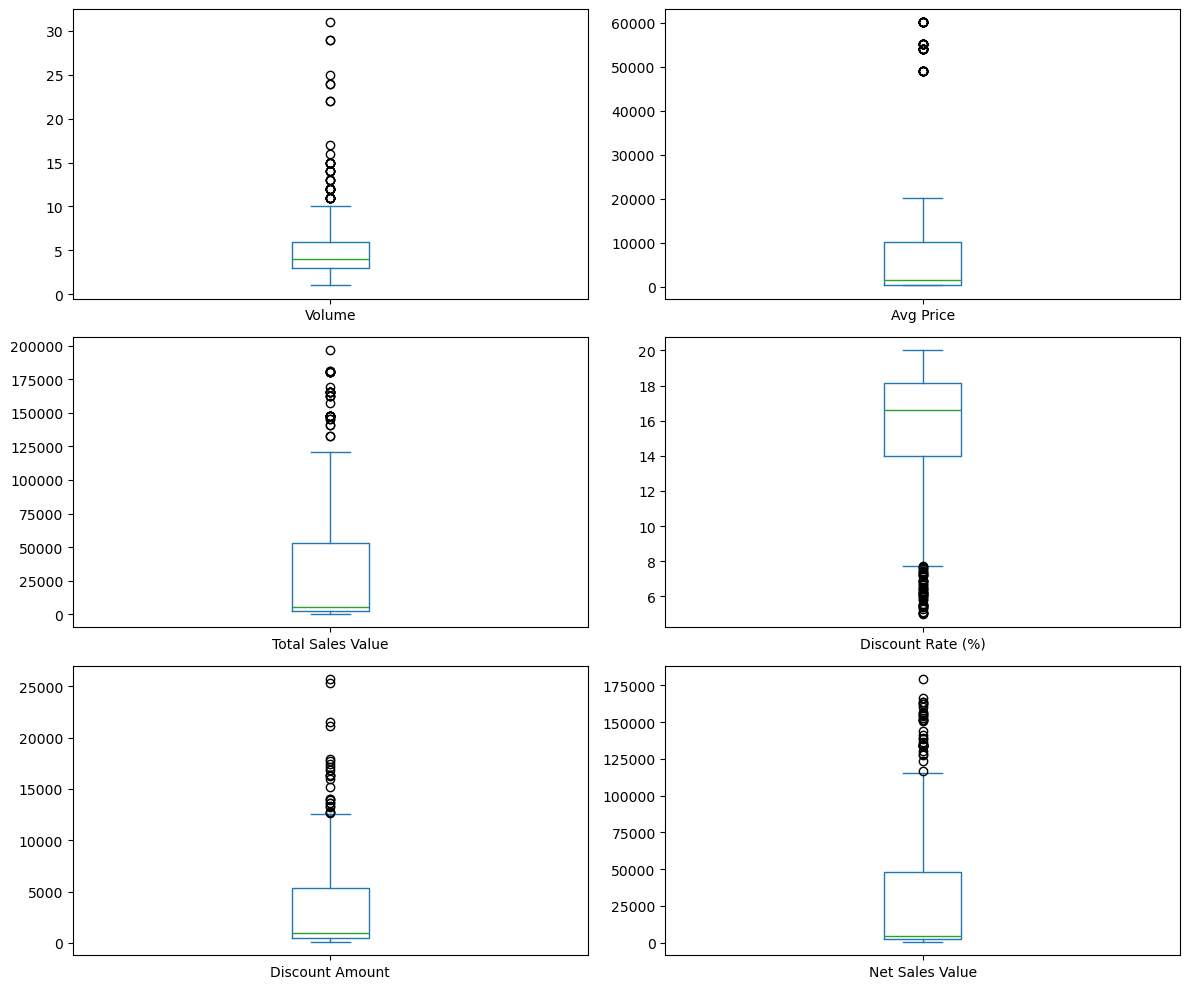

In [30]:
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
sales_data[numerical_columns].plot(
    kind='box', 
    subplots=True, 
    layout=(3, 2),  # Adjust layout to handle 6 plots (3 rows, 2 columns)
    figsize=(12, 10)  # Adjust figure size as needed
)

# Improve layout appearance
plt.tight_layout()

# Show the plot
plt.show()


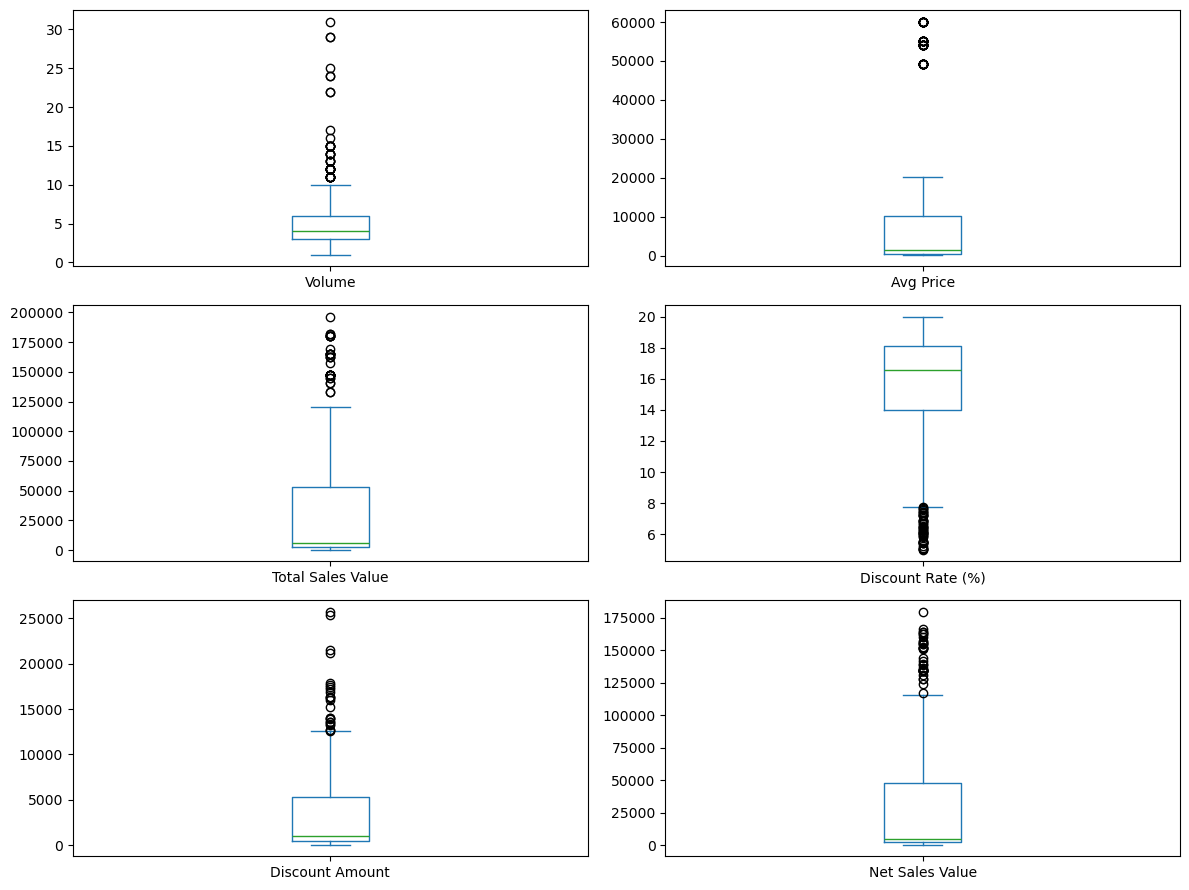

In [37]:
#daynmic layout (optional)
import math

# Determine the number of numerical columns
num_plots = len(numerical_columns)

# Calculate rows and columns dynamically
nrows = math.ceil(num_plots / 2)  # 2 columns per row
ncols = 2

# Plot dynamically
sales_data[numerical_columns].plot(
    kind='box',
    subplots=True,
    layout=(nrows, ncols),
    figsize=(12, nrows * 3)  # Adjust height based on rows
)

plt.tight_layout()
plt.show()


In [41]:
#	Identify Categorical Columns Identify categorical columns in the dataset.

categorical_columns = sales_data.select_dtypes(include=['object']).columns


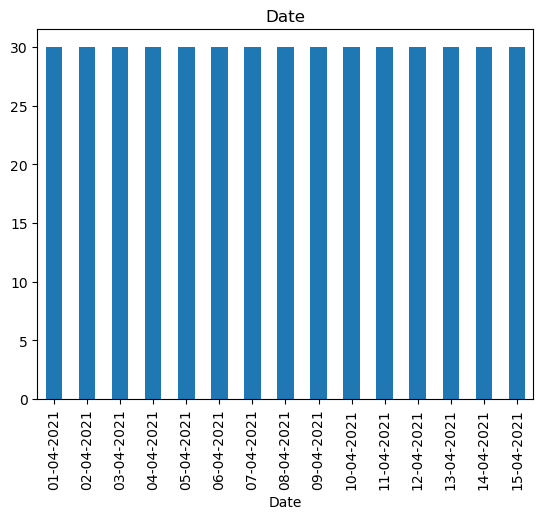

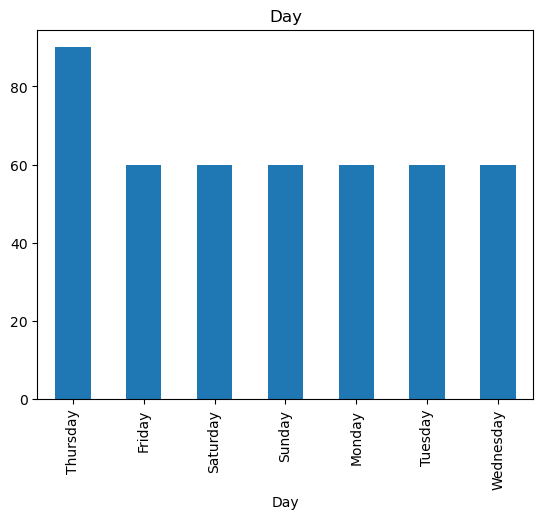

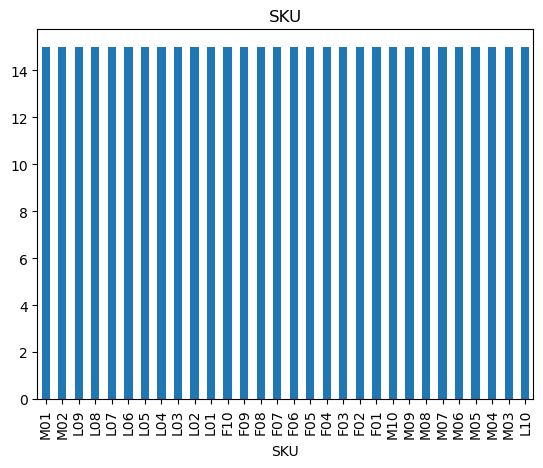

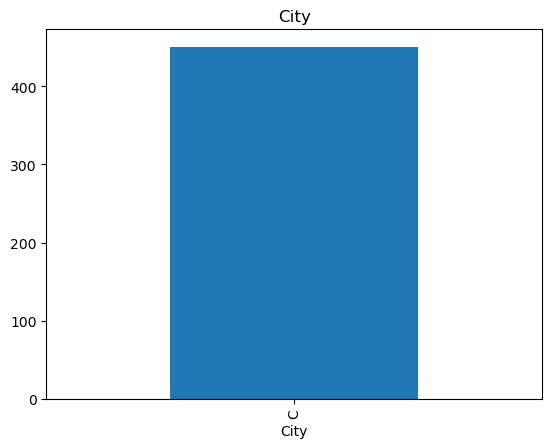

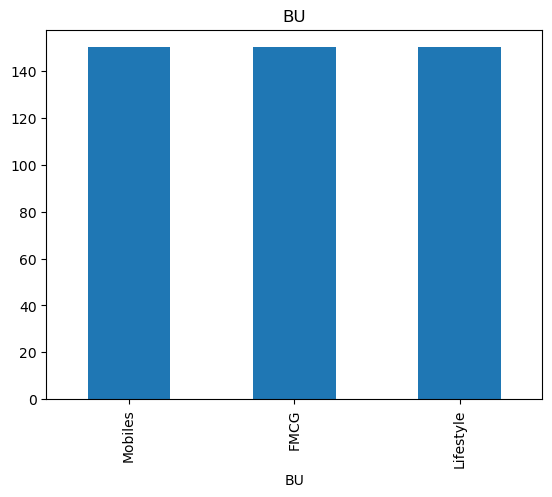

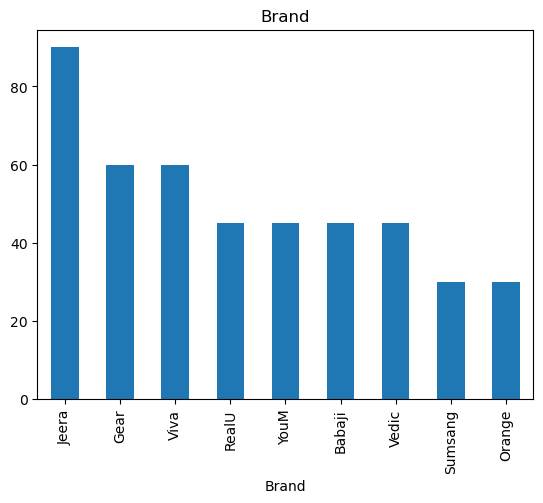

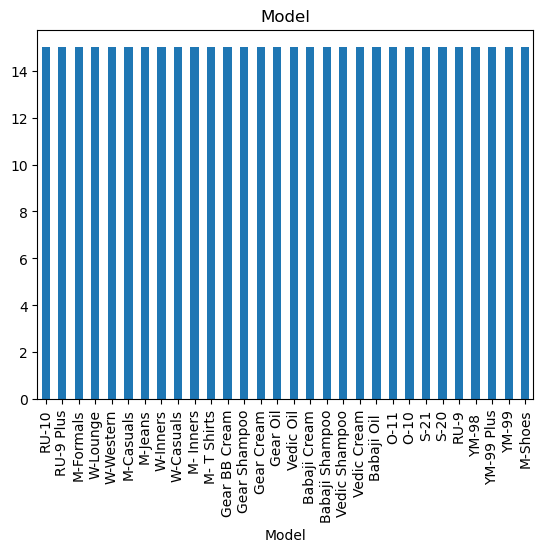

In [43]:
for col in categorical_columns:
    sales_data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


In [45]:
#Standardization of Numerical Variables


Standardization (z-score normalization) transforms data to have a mean of 0 and a standard deviation of 1. The formula used is: 
z = (x - μ) / σ
where x is the original value, μ is the mean, and σ is the standard deviation.

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2504131829.py, line 4)

In [47]:
from scipy.stats import zscore

standardized_data = sales_data[numerical_columns].apply(zscore)


C:\Users\AnkurS.Verma\AppData\Local\Temp\ipykernel_8512\2284273679.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  sales_data[numerical_columns].hist(ax=axes[0])
C:\Users\AnkurS.Verma\AppData\Local\Temp\ipykernel_8512\2284273679.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  standardized_data.hist(ax=axes[1])


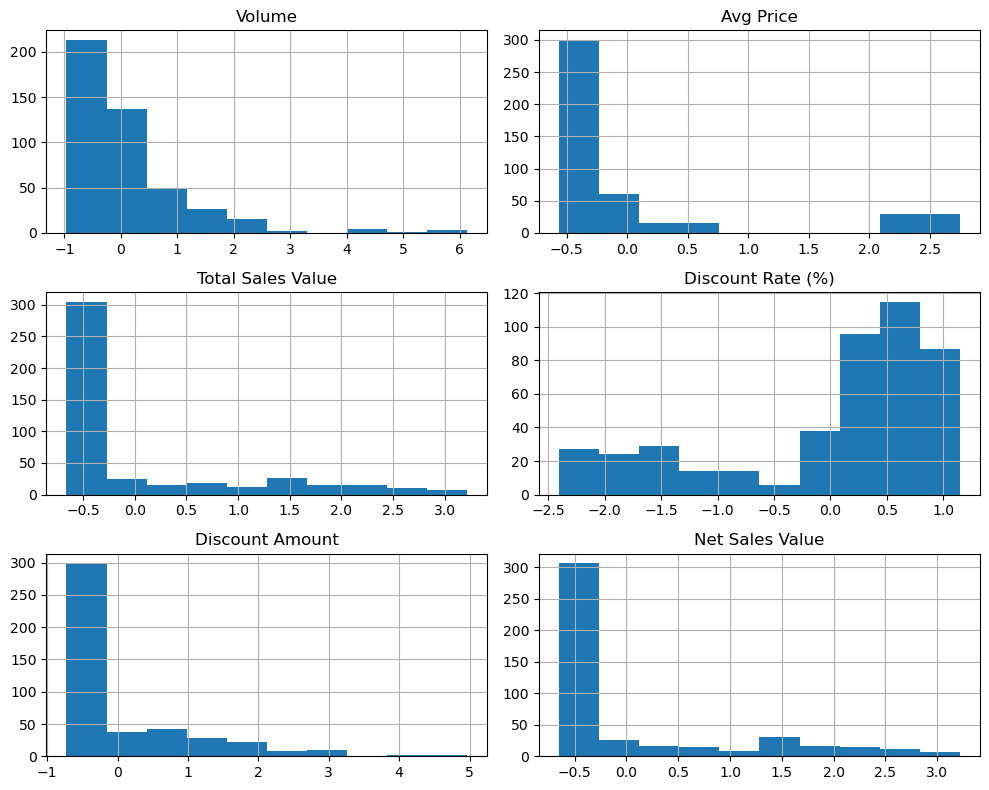

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Before standardization
sales_data[numerical_columns].hist(ax=axes[0])
axes[0].set_title('Before Standardization')

# After standardization
standardized_data.hist(ax=axes[1])
axes[1].set_title('After Standardization')
plt.tight_layout()
plt.show()



In [59]:
#Conversion of Categorical Data into Dummy Variables

#Apply One-Hot Encoding

encoded_data = pd.get_dummies(sales_data, columns=categorical_columns)


In [61]:
encoded_data.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
